# TP1 AA II EJ 1
Integrantes:
- Eugenio Bravi
- Augusto Rabbia
- Manuel Spreutels

# Problema 1

## Entorno

In [ ]:
!pip install -q gdown

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.preprocessing import StandardScaler

## Dataset

In [ ]:
import gdown

# TP1-1-student_performance.zip
gdown.download('https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc')


Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc
To: /content/TP1-1-student_performance.zip
100%|██████████| 49.7k/49.7k [00:00<00:00, 43.6MB/s]


'TP1-1-student_performance.zip'

In [ ]:
import zipfile

with zipfile.ZipFile('TP1-1-student_performance.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-1_P1')

In [ ]:
students_dataset = pd.read_csv('./TP1-1_P1/Student_Performance.csv', sep=',')
students_dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
students_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Todas las variables son numéricas, a excepción de `Extracurricular Activities`, que tiene 2 clases. La codificamos con 0 y 1.

In [ ]:
students_dataset["Extracurricular Activities"] = students_dataset["Extracurricular Activities"].map({"Yes": 1, "No": 0})

### Split

In [ ]:
# Split dataset
from sklearn.model_selection import train_test_split
X = students_dataset.drop('Performance Index', axis=1)
y = students_dataset['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
student_dataset = X_train.copy()
student_dataset['Performance Index'] = y_train


## Analisis

In [ ]:
students_dataset.isnull().sum()

In [ ]:
students_dataset.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


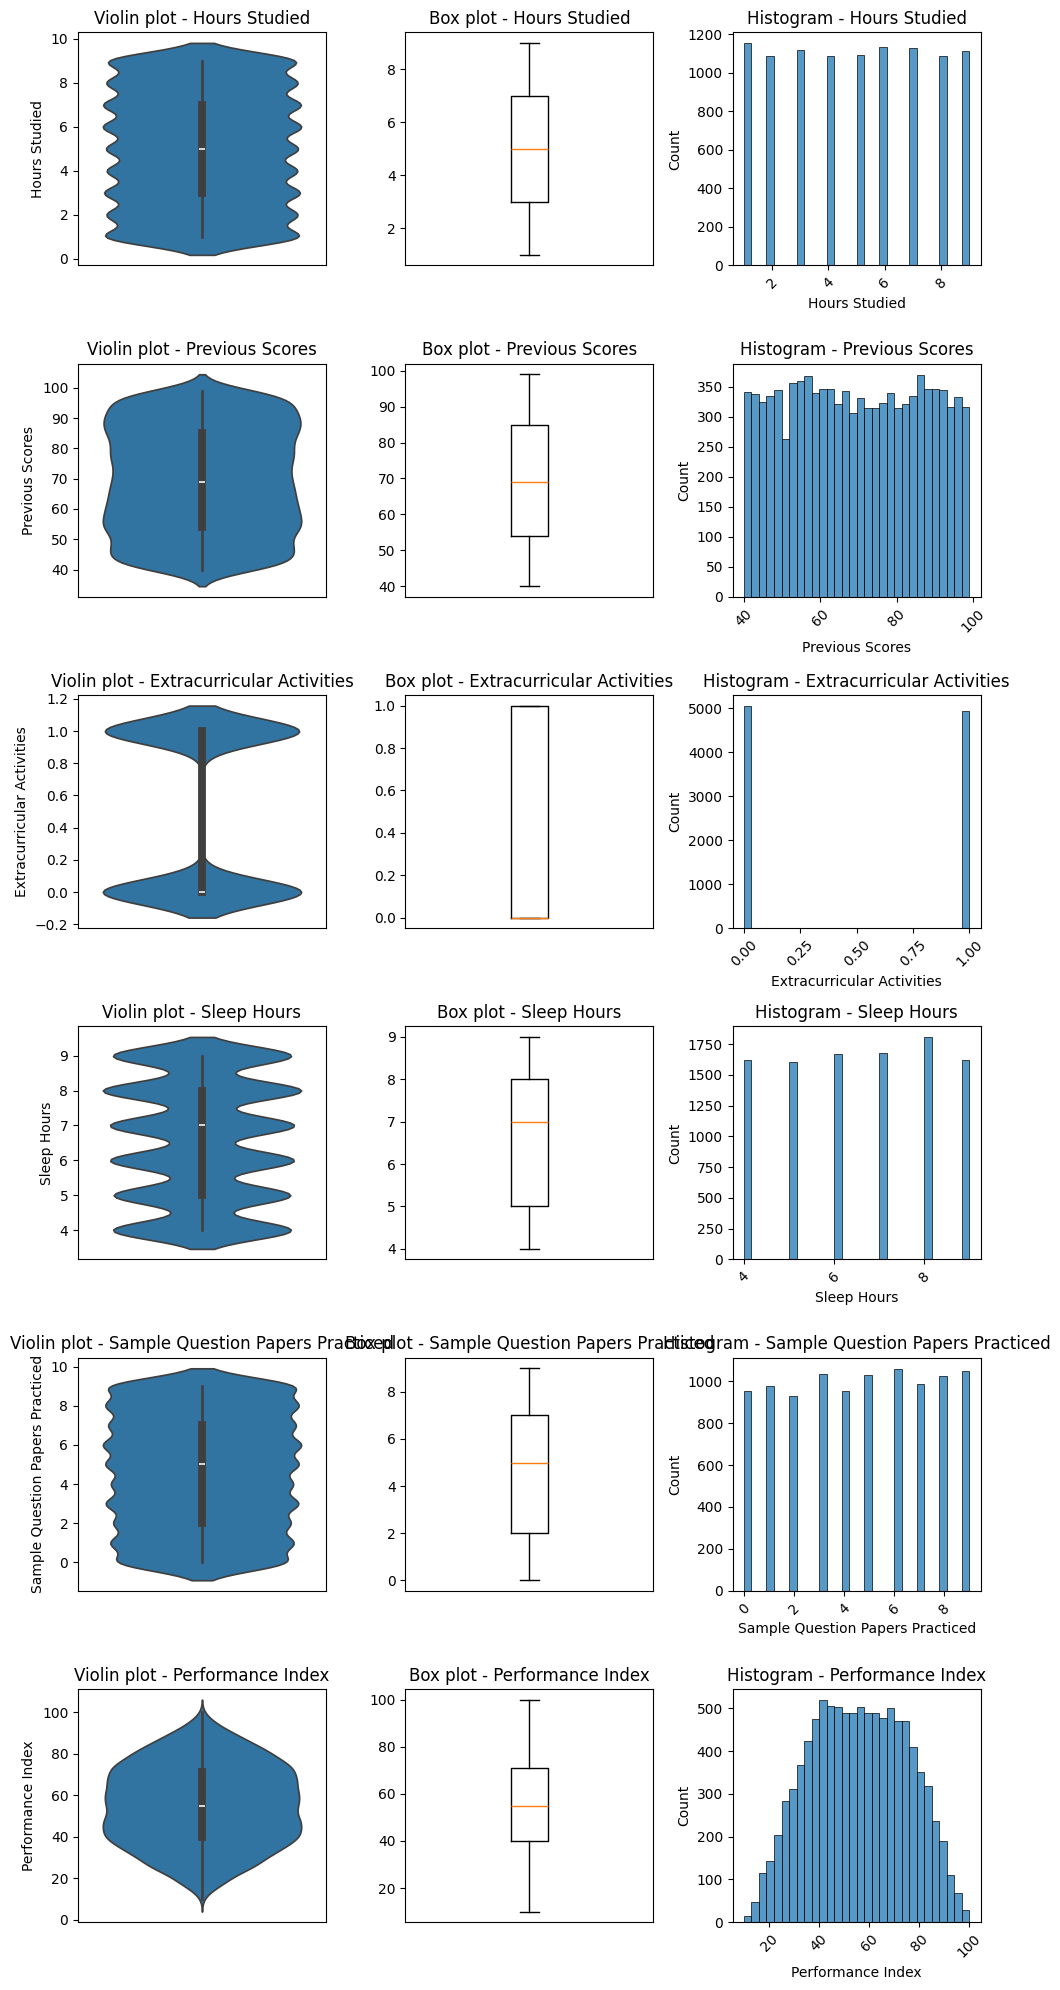

In [ ]:
# Graficamos las variables con violin plot, boxplot e histograma
plt.figure(figsize=(10,20))
for i, column in enumerate(students_dataset.columns):
    # Gráfico de violín
    plt.subplot(len(students_dataset.columns), 3, 3*i + 1)
    sns.violinplot(students_dataset[column])
    plt.title(f'Violin plot - {column}')
    plt.xticks([])

    # Gráfico de caja
    plt.subplot(len(students_dataset.columns), 3, 3*i + 2)
    plt.boxplot(students_dataset[column])
    plt.title(f'Box plot - {column}')
    plt.xticks([])

    # Histograma
    plt.subplot(len(students_dataset.columns), 3, 3*i + 3)
    sns.histplot(students_dataset[column], bins=30, kde=False)
    plt.title(f'Histogram - {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Se observa como las variables categoricas estan bien distribuidas por lo que no va a ser necesario un balanceo de clases.

### Correlaciones

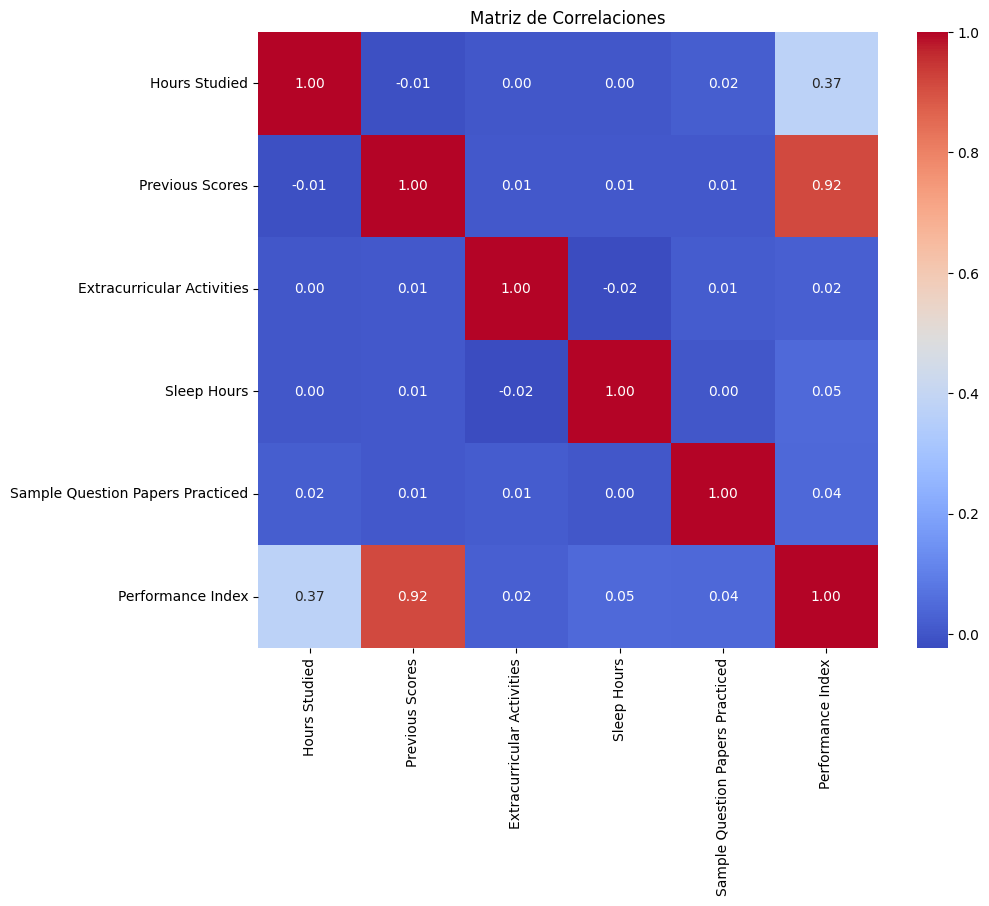

In [ ]:
correlation_matrix = students_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones')
plt.show()

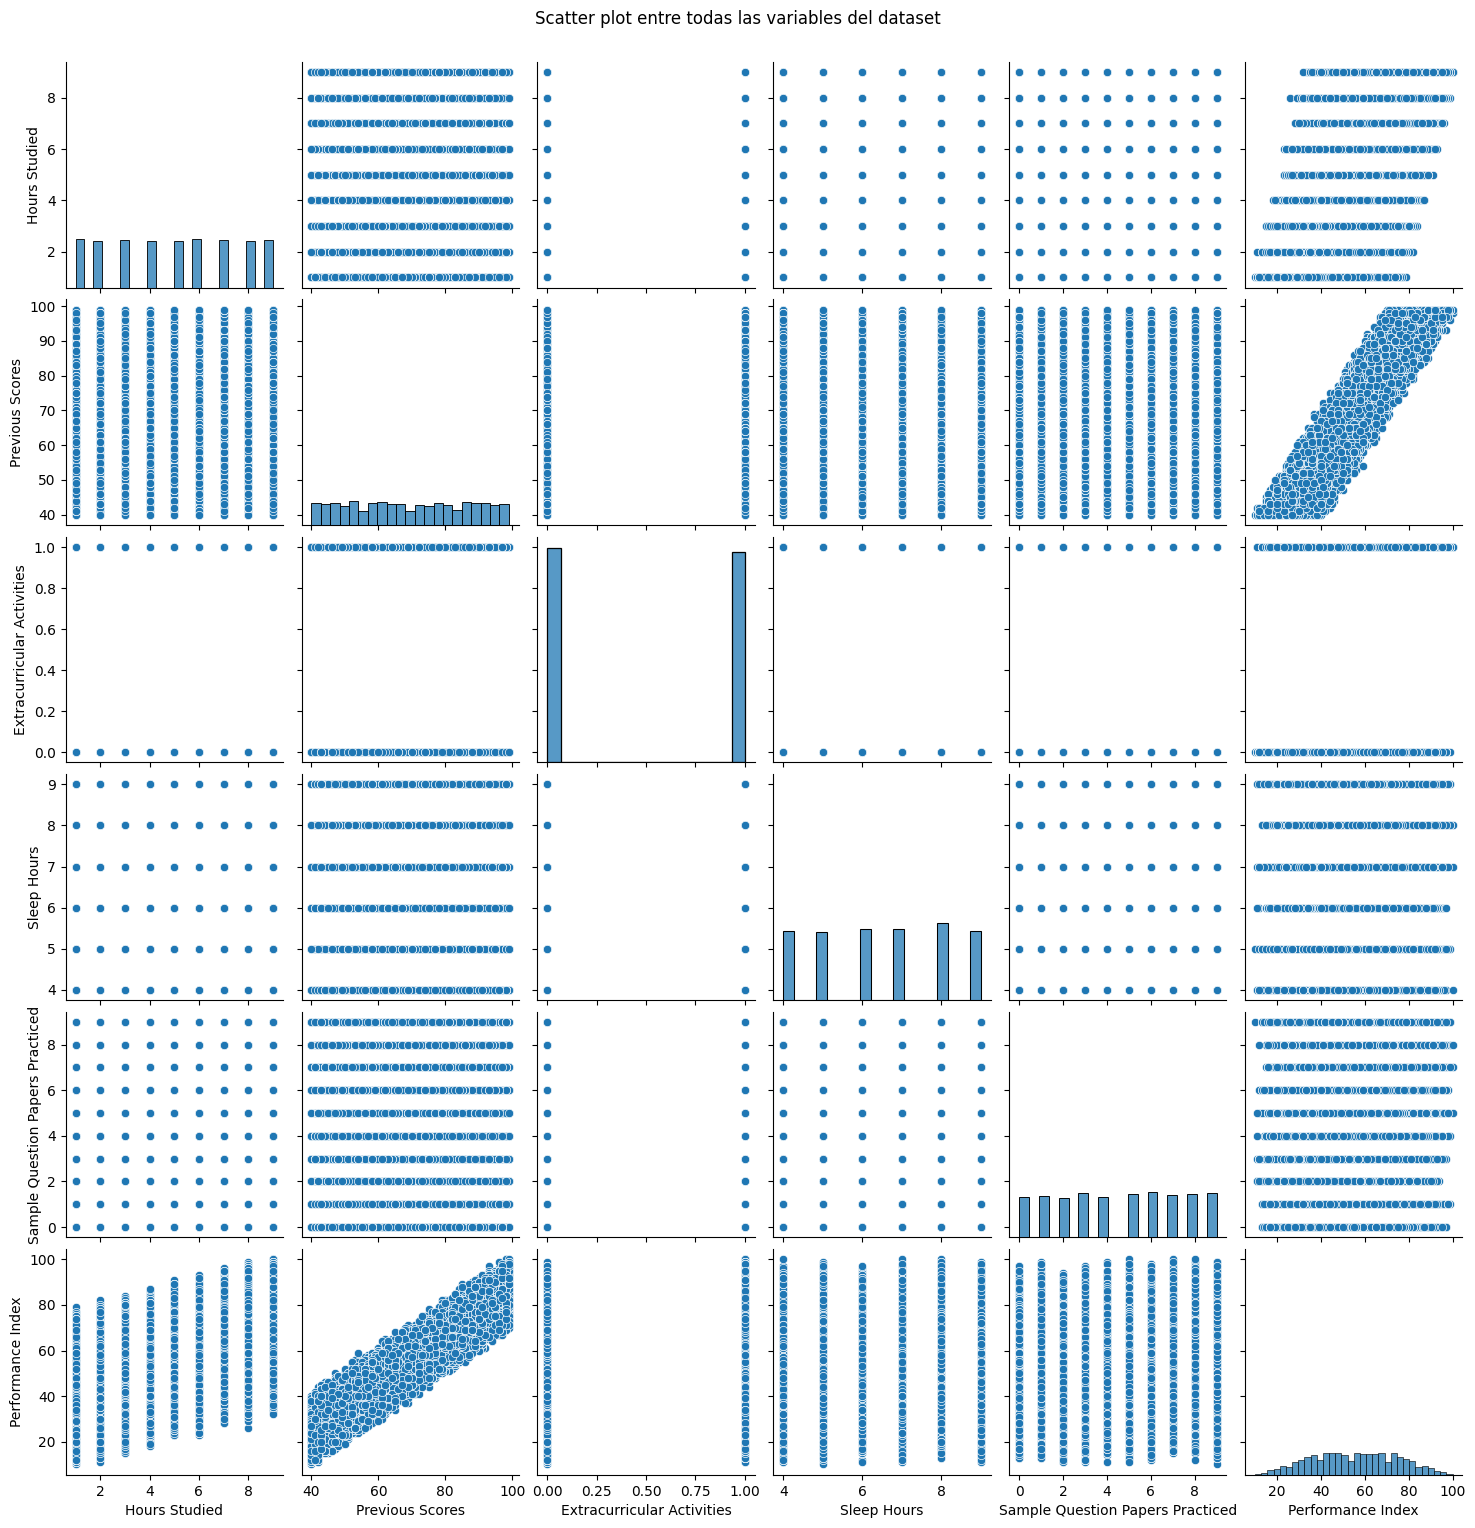

In [ ]:
#scatter plot de todas las variables
sns.pairplot(students_dataset)
plt.suptitle("Scatter plot entre todas las variables del dataset", y=1.02)
plt.show()


Se observa que solo las variables "Hours Studied" y "Previous Scores" tienen correlación y es con la variable de salida.

Se observa que las demas variables son independientes entre si ya que no se observa una relación lineal o no lineal entre las mismas.

## Estandarización

Hacemos estandarización Z-score

In [ ]:
# No estandarizamos la columna categórica
scaler = StandardScaler()
X_train_standard = X_train.copy().drop(columns=["Extracurricular Activities"])
X_test_standard = X_test.copy().drop(columns=["Extracurricular Activities"])
columnas = X_train_standard.columns

X_train_standard = scaler.fit_transform(X_train_standard)
X_test_standard = scaler.transform(X_test_standard) # NO hacemos fit acá, evitamos data leakage

X_train_standard = pd.DataFrame(X_train_standard, columns=columnas, index=X_train.index)
X_test_standard = pd.DataFrame(X_test_standard, columns=columnas, index=X_test.index)

# Concatenamos nuevamente la columna categórica
X_train_standard = pd.concat([X_train_standard, X_train["Extracurricular Activities"]], axis=1).reset_index(drop=True)
X_test_standard = pd.concat([X_test_standard, X_test["Extracurricular Activities"]], axis=1).reset_index(drop=True)

X_train = X_train_standard
X_test = X_test_standard

In [ ]:
X_train.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities
0,0.006455,-1.183844,0.269888,0.134041,0
1,-1.149747,-1.241506,0.269888,0.483562,1
2,-1.149747,0.661318,0.269888,-0.914520,0
3,-1.149747,-1.356828,-0.318906,-1.264041,0
4,1.162658,-1.299167,1.447477,-1.613561,0


## Modelos

### Definir modelos

In [ ]:
from os import name
# M = Medium, S = Small, L = Large
modelo_todas_las_variables_M = Sequential(
    [
        Input(shape=(5,)),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ]
    ,name="modelo_todas_las_variables_M"
)

modelo_variables_correlacionadas_M = Sequential(
    [
        Input(shape=(2,)),
        Dense(64, activation='relu'),
        Dense(1, activation='linear'),
    ]
    ,name="modelo_variables_correlacionadas_M"
)
modelo_todas_las_variables_S = Sequential(
    [
        Input(shape=(5,)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ]
    ,name="modelo_todas_las_variables_S"
)

modelo_variables_correlacionadas_S = Sequential(
    [
        Input(shape=(2,)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear'),
    ]
    ,name="modelo_variables_correlacionadas_S"
)
modelo_todas_las_variables_nano = Sequential(
    [
        Input(shape=(5,)),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ]
    ,name="modelo_todas_las_variables_nano"
)

modelo_variables_correlacionadas_nano = Sequential(
    [
        Input(shape=(2,)),
        Dense(16, activation='relu'),
        Dense(1, activation='linear'),
    ]
    ,name="modelo_variables_correlacionadas_nano"
)
modelo_todas_las_variables_L = Sequential(
    [
        Input(shape=(5,)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ]
    ,name="modelo_todas_las_variables_L"
)

modelo_variables_correlacionadas_L = Sequential(
    [
        Input(shape=(2,)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='linear'),
    ],name="modelo_variables_correlacionadas_L"
)
modelos_todas_las_variables = [modelo_todas_las_variables_M,modelo_todas_las_variables_S,modelo_todas_las_variables_nano,modelo_todas_las_variables_L]
modelos_variables_correlacionadas = [modelo_variables_correlacionadas_M,modelo_variables_correlacionadas_S,modelo_variables_correlacionadas_nano,modelo_variables_correlacionadas_L]

### Train - Test

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import R2Score

def train_test_modelos(model,X_train,X_test,initial_lr):
  loss_fn = tf.keras.losses.MeanSquaredError()
  optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
  model.compile(optimizer=optimizer, loss=loss_fn, metrics=[R2Score()])
  # Seteamos el callback para entrenamiento
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=100, verbose=0, mode="min",min_delta=0.0001)

  # Entrenamiento
  history = model.fit(X_train, y_train, epochs=10000, validation_split=0.2,batch_size=len(X_train),verbose=0,callbacks=[early_stopping])

  # Graficamos history
  plt.figure(figsize=(10, 5))
  plt.title("Entrenamiento de " + model.name)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.show()

  #Testeamos el dataset de testeo
  test_loss = model.evaluate(X_test, y_test, verbose=0,batch_size=len(X_test))
  print("######################################\n")
  print(model.name)
  print(f"Loss en test: {test_loss[0]:.4f}\nR^2:{test_loss[1]:.4f}")
  print("######################################\n")


  # mostramos 10 ejemplos al azar
  predicciones = model.predict(X_test, verbose=0,batch_size=len(X_test))

  # Elegir 10 índices al azar
  indices_azar = np.random.choice(len(X_test), size=10, replace=False)

  # Crear DataFrame para mostrar resultados
  resultados = pd.DataFrame({
      'Real': y_test.iloc[indices_azar],
      'prediccion': predicciones[indices_azar].ravel()
  })

  print(resultados)
  print("######################################\n\n")
  return (model.name,test_loss[0], test_loss[1])

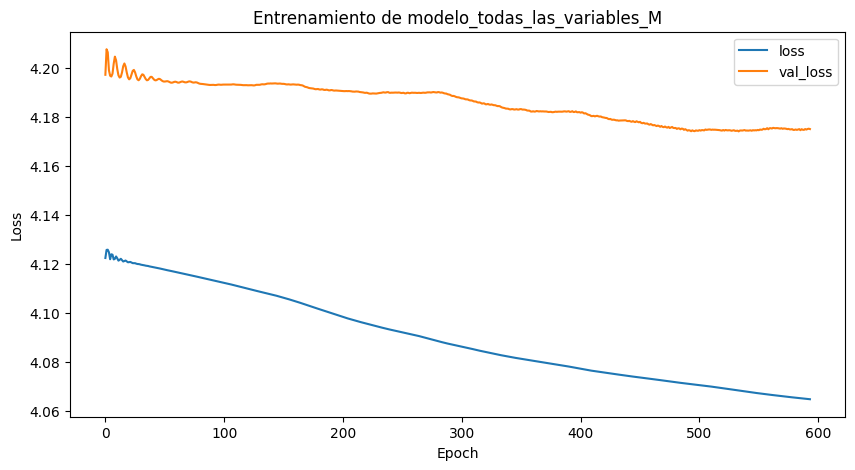

######################################

modelo_todas_las_variables_M
Loss en test: 4.2580
R^2:0.9885
######################################

      Real  prediccion
4516  72.0   71.978859
2750  66.0   63.340775
1617  87.0   83.740532
8474  52.0   49.566269
7753  73.0   72.732674
5062  42.0   38.484245
9644  71.0   73.332977
6688  81.0   80.933388
2075  36.0   33.951393
5910  52.0   54.694996
######################################




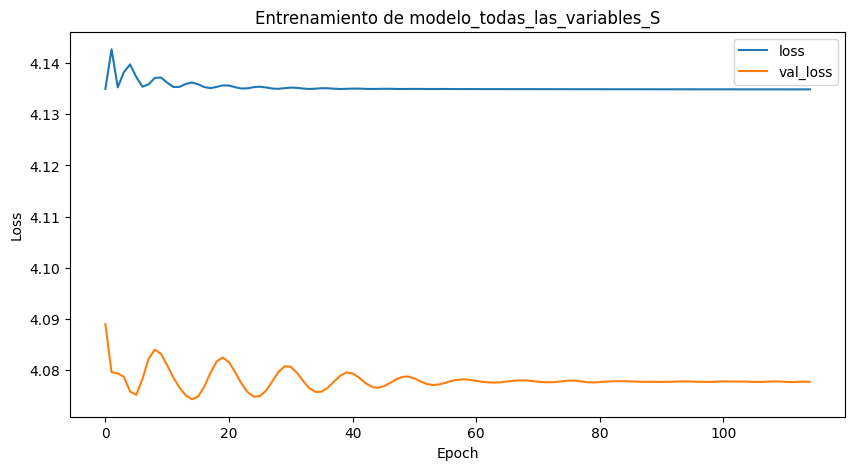

######################################

modelo_todas_las_variables_S
Loss en test: 4.1928
R^2:0.9887
######################################

      Real  prediccion
7821  38.0   40.533787
2609  38.0   37.781445
2943  74.0   73.358002
8756  43.0   41.683670
4898  76.0   77.209351
6670  44.0   43.229832
5790  68.0   71.666824
7108  88.0   87.343002
4220  54.0   53.817677
1915  85.0   84.177872
######################################




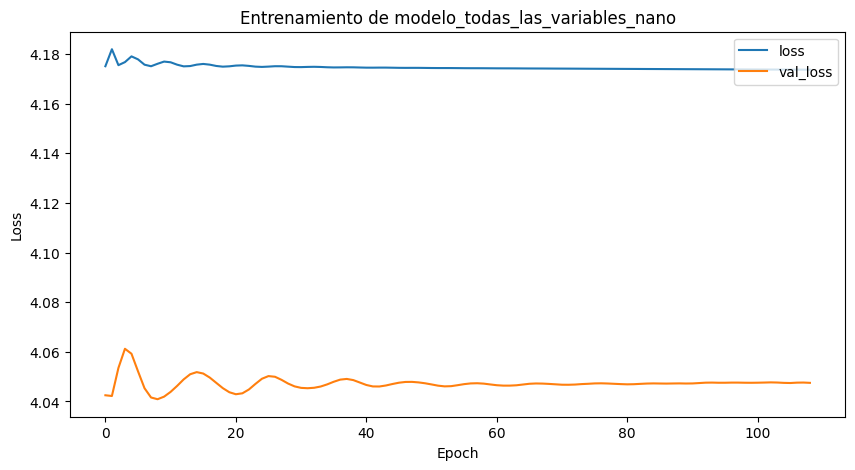

######################################

modelo_todas_las_variables_nano
Loss en test: 4.1194
R^2:0.9889
######################################

      Real  prediccion
4254  86.0   84.584969
965   64.0   64.982445
9366  67.0   67.410576
7091  61.0   60.520275
1347  20.0   17.614618
705   44.0   43.129688
1785  49.0   48.789280
5405  72.0   74.471359
8944  37.0   37.330593
5851  62.0   63.032204
######################################




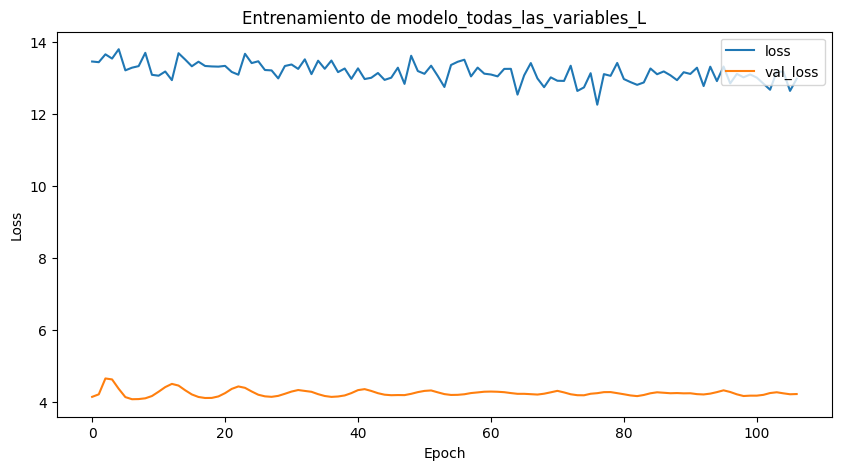

######################################

modelo_todas_las_variables_L
Loss en test: 4.2092
R^2:0.9886
######################################

      Real  prediccion
8894  17.0   16.245674
6608  51.0   52.351429
6201  76.0   73.070755
347   64.0   61.020897
9334  54.0   52.792179
2823  63.0   58.728573
5406  31.0   30.421160
2183  43.0   46.182308
9874  37.0   36.431721
5833  32.0   32.986233
######################################




In [ ]:
resultados_todas_las_variables = []
for modelo in modelos_todas_las_variables:
  resultado = train_test_modelos(modelo,X_train,X_test,initial_lr=0.001)
  resultados_todas_las_variables.append(resultado)

In [ ]:
X_train_corr = X_train[['Hours Studied', 'Previous Scores']]
X_test_corr = X_test[['Hours Studied', 'Previous Scores']]

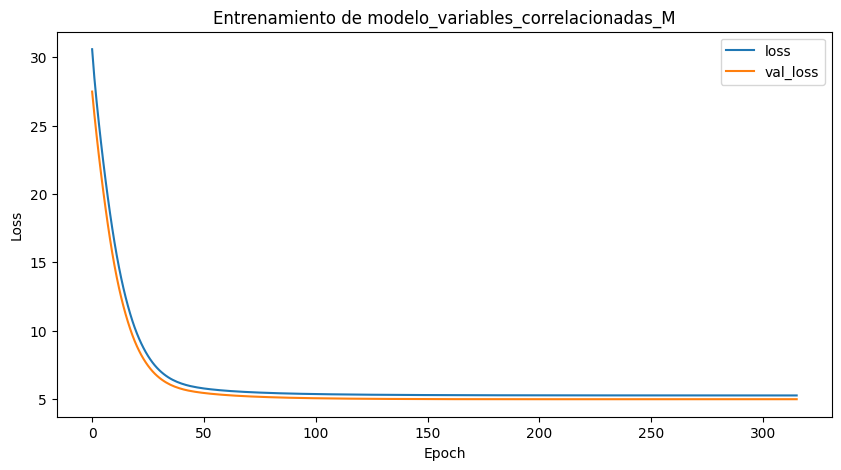

######################################

modelo_variables_correlacionadas_M
Loss en test: 5.2429
R^2:0.9859
######################################

      Real  prediccion
9056  79.0   79.409836
7539  82.0   87.937347
9277  63.0   62.112988
2737  43.0   47.117596
6163  78.0   76.346367
1650  49.0   49.739223
7791  12.0   15.134753
4684  20.0   22.633900
6625  86.0   84.238892
7934  67.0   63.870251
######################################




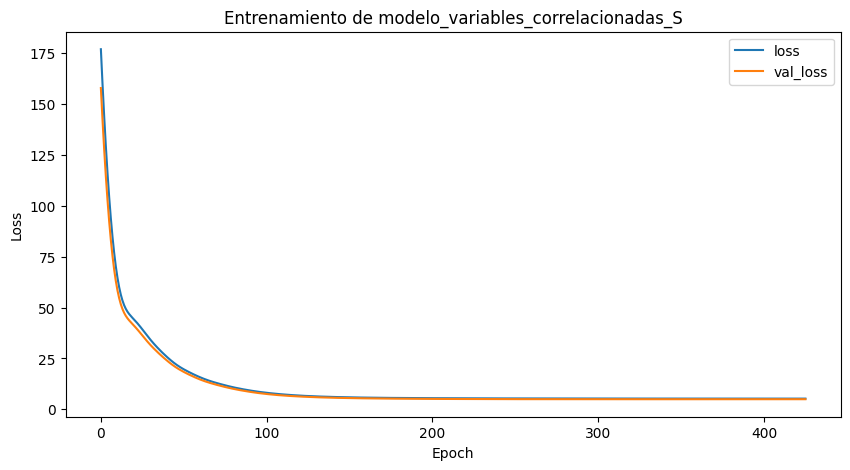

######################################

modelo_variables_correlacionadas_S
Loss en test: 5.2468
R^2:0.9858
######################################

      Real  prediccion
5938  37.0   40.353817
7736  43.0   42.475521
8287  40.0   39.223114
7920  47.0   44.937588
3776  61.0   58.517239
7821  38.0   40.508282
7058  52.0   51.792072
2997  63.0   64.361038
833   60.0   60.758961
1864  49.0   50.120350
######################################




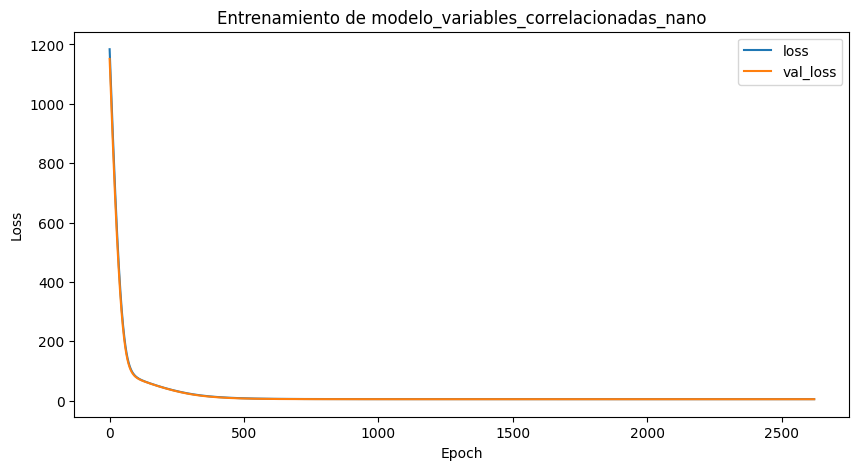

######################################

modelo_variables_correlacionadas_nano
Loss en test: 5.2445
R^2:0.9858
######################################

      Real  prediccion
1458  60.0   60.720390
5300  31.0   31.047449
9495  29.0   34.327236
2498  36.0   37.382397
4514  52.0   50.266571
8020  53.0   54.334148
9063  25.0   25.312094
1263  23.0   22.106581
8832  84.0   84.942856
9308  38.0   36.131924
######################################




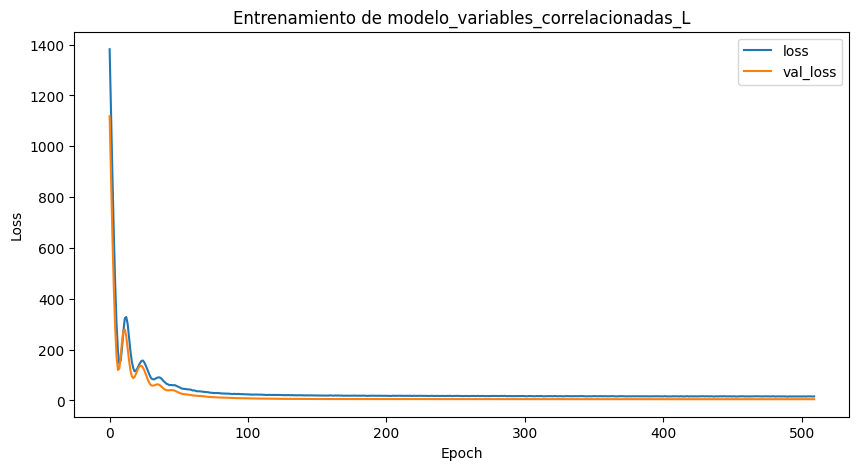

######################################

modelo_variables_correlacionadas_L
Loss en test: 5.2771
R^2:0.9858
######################################

      Real  prediccion
6440  68.0   67.113617
467   71.0   69.968063
3172  61.0   59.400612
1197  45.0   46.211571
3034  48.0   50.658504
605   57.0   55.942230
2935  79.0   78.490837
4194  47.0   47.213638
2906  70.0   72.191528
2167  46.0   45.799934
######################################




In [ ]:
resultados_variables_correlacionadas = []
for modelo in modelos_variables_correlacionadas:
  resultado = train_test_modelos(modelo,X_train_corr,X_test_corr,initial_lr=0.01)
  resultados_variables_correlacionadas.append(resultado)

In [ ]:
df_todas = pd.DataFrame(resultados_todas_las_variables, columns=['Modelo', 'Loss', 'R2'])
df_corr = pd.DataFrame(resultados_variables_correlacionadas, columns=['Modelo', 'Loss', 'R2'])

In [ ]:
# concatenamos ambos dataframes
df_concatenado = pd.concat([df_todas, df_corr]).reset_index(drop=True)


,Modelo,Loss,R2
0,modelo_todas_las_variables_M,4.257990,0.988510
1,modelo_todas_las_variables_S,4.192815,0.988686
2,modelo_todas_las_variables_nano,4.119403,0.988884
3,modelo_todas_las_variables_L,4.209207,0.988642
4,modelo_variables_correlacionadas_M,5.242944,0.985852
5,modelo_variables_correlacionadas_S,5.246822,0.985842
6,modelo_variables_correlacionadas_nano,5.244505,0.985848
7,modelo_variables_correlacionadas_L,5.277093,0.985760


In [ ]:
id_max = df_concatenado['R2'].idxmax()
df_concatenado.loc[id_max]

,2
Modelo,modelo_todas_las_variables_nano
Loss,4.119403
R2,0.988884


## Conclusiones

Llamativamente, a medida que utilizamos modelos más simples mejora el rendimiento, medido en términos del R2. Esto sucede tanto para los modelos de 2 variables como los de todas las variables.
De todas los modelos entrenado, el mejor resulto ser el más simple de aquellos que hacen uso de todas las variables para predecir, aunque la diferencia entre todos es ínfima.
Todos los modelos lograron sin embargo excelentes resultados en el conjunto de testeo.